# Obtención y preparación de los datos.
https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('data/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df = df.drop(['ID'], axis = 1)
df = df.drop(['Name'], axis = 1)
df = df.drop(['Games'], axis = 1)
df = df.drop(['NOC'], axis = 1)
df = df.drop(['Event'], axis = 1)
df = df.drop(['Season'], axis = 1)
df = df.drop(['City'], axis = 1)
df.head()

,Sex,Age,Height,Weight,Team,Year,Sport,Medal
0,M,24.0,180.0,80.0,China,1992,Basketball,NaN
1,M,23.0,170.0,60.0,China,2012,Judo,NaN
2,M,24.0,NaN,NaN,Denmark,1920,Football,NaN
3,M,34.0,NaN,NaN,Denmark/Sweden,1900,Tug-Of-War,Gold
4,F,21.0,185.0,82.0,Netherlands,1988,Speed Skating,NaN


In [4]:
df.dtypes

Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
Year        int64
Sport      object
Medal      object
dtype: object

In [5]:
count = df['Sex'].value_counts()
print(count)

M    196594
F     74522
Name: Sex, dtype: int64


In [6]:
count = df['Team'].value_counts()
print(count)

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
                 ...  
Baby-9               1
Marsouin-26          1
Heidelberg           1
Ducky-16             1
Mignon-29            1
Name: Team, Length: 1184, dtype: int64


In [7]:
count = df['Sport'].value_counts()
print(count)

Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10859
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: Sport, Length: 66, dtype: int64


In [8]:
count = df['Medal'].value_counts()
print(count)

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64


In [9]:
df['Medal'] = df['Medal'].fillna('No medal')

In [10]:
count = df['Medal'].value_counts()
print(count)

No medal    231333
Gold         13372
Bronze       13295
Silver       13116
Name: Medal, dtype: int64


In [11]:
df.describe()

,Age,Height,Weight,Year
count,261642.000000,210945.000000,208241.000000,271116.000000
mean,25.556898,175.338970,70.702393,1978.378480
std,6.393561,10.518462,14.348020,29.877632
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


In [12]:
df = df.dropna()
df.describe()

,Age,Height,Weight,Year
count,206165.000000,206165.000000,206165.000000,206165.000000
mean,25.055509,175.371950,70.688337,1989.674678
std,5.483096,10.546088,14.340338,20.130865
min,11.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1976.000000
50%,24.000000,175.000000,70.000000,1992.000000
75%,28.000000,183.000000,79.000000,2006.000000
max,71.000000,226.000000,214.000000,2016.000000


# Codificación por Etiquetas.

In [13]:
df['Sex'] = df['Sex'].astype('category')
df.dtypes

Sex       category
Age        float64
Height     float64
Weight     float64
Team        object
Year         int64
Sport       object
Medal       object
dtype: object

In [14]:
df['Sex'] = df['Sex'].cat.codes
df.dtypes

Sex          int8
Age       float64
Height    float64
Weight    float64
Team       object
Year        int64
Sport      object
Medal      object
dtype: object

In [15]:
count = df['Sex'].value_counts()
print(count)

1    139454
0     66711
Name: Sex, dtype: int64


In [16]:
df.head()

,Sex,Age,Height,Weight,Team,Year,Sport,Medal
0,1,24.0,180.0,80.0,China,1992,Basketball,No medal
1,1,23.0,170.0,60.0,China,2012,Judo,No medal
4,0,21.0,185.0,82.0,Netherlands,1988,Speed Skating,No medal
5,0,21.0,185.0,82.0,Netherlands,1988,Speed Skating,No medal
6,0,25.0,185.0,82.0,Netherlands,1992,Speed Skating,No medal


In [17]:
df['Team'] = df['Team'].astype('category')
df['Team'] = df['Team'].cat.codes
df.head()

,Sex,Age,Height,Weight,Team,Year,Sport,Medal
0,1,24.0,180.0,80.0,114,1992,Basketball,No medal
1,1,23.0,170.0,60.0,114,2012,Judo,No medal
4,0,21.0,185.0,82.0,374,1988,Speed Skating,No medal
5,0,21.0,185.0,82.0,374,1988,Speed Skating,No medal
6,0,25.0,185.0,82.0,374,1992,Speed Skating,No medal


In [18]:
count = df['Team'].value_counts()
print(count)

608    13714
193     7807
100     7668
218     7499
265     7433
       ...  
456        1
584        1
73         1
202        1
639        1
Name: Team, Length: 660, dtype: int64


In [19]:
df['Sport'] = df['Sport'].astype('category')
df['Sport'] = df['Sport'].cat.codes
df.head()

,Sex,Age,Height,Weight,Team,Year,Sport,Medal
0,1,24.0,180.0,80.0,114,1992,6,No medal
1,1,23.0,170.0,60.0,114,2012,26,No medal
4,0,21.0,185.0,82.0,374,1988,43,No medal
5,0,21.0,185.0,82.0,374,1988,43,No medal
6,0,25.0,185.0,82.0,374,1992,43,No medal


In [20]:
df.describe()

,Sex,Age,Height,Weight,Team,Year,Sport
count,206165.000000,206165.000000,206165.000000,206165.000000,206165.000000,206165.000000,206165.000000
mean,0.676419,25.055509,175.371950,70.688337,317.262256,1989.674678,22.908869
std,0.467843,5.483096,10.546088,14.340338,190.436096,20.130865,16.493733
min,0.000000,11.000000,127.000000,25.000000,0.000000,1896.000000,0.000000
25%,0.000000,21.000000,168.000000,60.000000,166.000000,1976.000000,8.000000
50%,1.000000,24.000000,175.000000,70.000000,265.000000,1992.000000,22.000000
75%,1.000000,28.000000,183.000000,79.000000,522.000000,2006.000000,37.000000
max,1.000000,71.000000,226.000000,214.000000,659.000000,2016.000000,55.000000


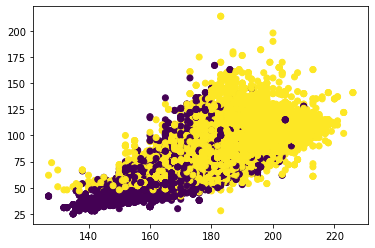

In [21]:
fig = plt.figure()
plt.scatter(df['Height'], df['Weight'], c = df['Sex'])
plt.show()

In [22]:
df.dtypes

Sex          int8
Age       float64
Height    float64
Weight    float64
Team        int16
Year        int64
Sport        int8
Medal      object
dtype: object

# One Hot Encoding.

In [23]:
df = pd.get_dummies(df, columns=['Medal'])
df.head()

,Sex,Age,Height,Weight,Team,Year,Sport,Medal_Bronze,Medal_Gold,Medal_No medal,Medal_Silver
0,1,24.0,180.0,80.0,114,1992,6,0,0,1,0
1,1,23.0,170.0,60.0,114,2012,26,0,0,1,0
4,0,21.0,185.0,82.0,374,1988,43,0,0,1,0
5,0,21.0,185.0,82.0,374,1988,43,0,0,1,0
6,0,25.0,185.0,82.0,374,1992,43,0,0,1,0


In [24]:
df.dtypes

Sex                  int8
Age               float64
Height            float64
Weight            float64
Team                int16
Year                int64
Sport                int8
Medal_Bronze        uint8
Medal_Gold          uint8
Medal_No medal      uint8
Medal_Silver        uint8
dtype: object

In [25]:
df.columns

Index(['Sex', 'Age', 'Height', 'Weight', 'Team', 'Year', 'Sport',
       'Medal_Bronze', 'Medal_Gold', 'Medal_No medal', 'Medal_Silver'],
      dtype='object')

In [26]:
columns = ['Sex', 'Age', 'Height', 'Weight', 'Team', 'Year', 'Sport', 'Medal_No medal',
       'Medal_Bronze', 'Medal_Silver', 'Medal_Gold']
df = df[columns]

In [27]:
df.head()

,Sex,Age,Height,Weight,Team,Year,Sport,Medal_No medal,Medal_Bronze,Medal_Silver,Medal_Gold
0,1,24.0,180.0,80.0,114,1992,6,1,0,0,0
1,1,23.0,170.0,60.0,114,2012,26,1,0,0,0
4,0,21.0,185.0,82.0,374,1988,43,1,0,0,0
5,0,21.0,185.0,82.0,374,1988,43,1,0,0,0
6,0,25.0,185.0,82.0,374,1992,43,1,0,0,0
